In [26]:
# Adapted From https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Adapted From https://medium.com/coinmonks/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-5ebddf46dc8
# Adapted from https://www.tensorflow.org/guide/keras/save_and_serialize
# imports 
import tensorflow as tf
from tensorflow import keras
import numpy as np

# import the mnist dataset from keras
from keras.datasets import mnist
# matplotlib used to visualise the data
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [27]:
# Loading in the dataset
# x_train is the image of number, y_train is the number the image contains
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
# (Amount of images in the dataset, Rows of pixels, Cols of pixels)
x_train.shape




(60000, 28, 28)

5


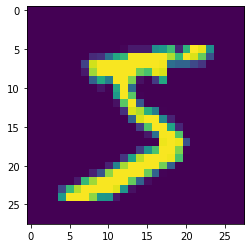

In [29]:
%matplotlib inline 
image_index = 0
print(y_train[image_index])
# Prints out the first image as it appears in the file
plt.imshow(x_train[image_index])

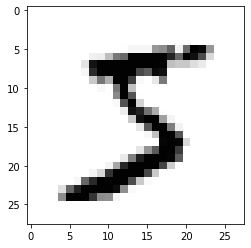

In [30]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Printing the first image out in greyscale
plt.imshow(x_train[image_index], cmap='Greys')

In [31]:
# The input shape that the CNN expects is a 4D Array - batch, height, width, channels
# The channels show whether the image is greyscaled or coloured
# 1 is given because greyscaled images are being used (3 for coloured)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


# Type float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
# dataset has each pixel between 0-255, it is now 0-1
# http://aishack.in/tutorials/normalized-rgb/
x_train /= 255
x_test /= 255

# print outs
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [32]:

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [33]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2009 - accuracy: 0.9404
Epoch 2/10
60000/60000 [==============================] - 58s 959us/step - loss: 0.0767 - accuracy: 0.9765
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0536 - accuracy: 0.9836
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0409 - accuracy: 0.9866
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0329 - accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 52s 867us/step - loss: 0.0281 - accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.0231 - accuracy: 0.9920
Epoch 8/10
60000/60000 [==============================] - 49s 816us/step - loss: 0.0203 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 46s 771us/step - loss: 0.0186 - accuracy: 0.9936
Epoch 10/10
60000/60000 [====================

In [34]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 242us/step


[0.06849769486123114, 0.9843000173568726]

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [36]:
# Save predictions for future checks
predictions = model.predict(x_test)

In [37]:
model_json = model.to_json()

with open("Model/model.json", "w") as json_file:
  json_file.write(model_json)



# Save the weights
model.save('../FlaskWebApp/model.h5')

In [38]:
new_model = keras.models.load_model('../FlaskWebApp/model.h5')

TypeError: Unexpected keyword argument passed to optimizer: learning_rate

In [39]:
predictions = new_model.predict([x_test])

# print('x_test shape', [x_test])

# use numpy to help make a prediction on x_test set
print('At predictions index 0, number is a ', np.argmax(predictions[4]))

NameError: name 'new_model' is not defined

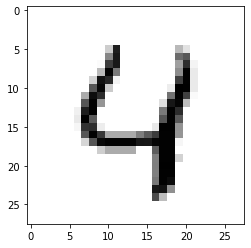

In [141]:
# prints out the first image in the test dataset
plt.imshow(x_test[4].reshape(28, 28), cmap=plt.cm.binary)